In [3]:
!pip install numpy

In [4]:
import numpy as np

In [5]:
np.version.version

'1.20.1'

In [6]:
!pip install pandas

In [7]:
import pandas as pd
pd.__version__

'1.2.4'

In [8]:
!pip install seaborn

In [9]:
import seaborn as sns
sns.__version__

'0.11.1'

In [10]:
!pip install matplotlib

In [11]:
import matplotlib.pyplot as plt

In [12]:
df= pd.DataFrame()

In [13]:
df=pd.read_csv(r"C:\Users\VELU\Desktop\Board Infi\Anaconda\Python\Proj 1\playstore-analysis.csv")

In [14]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

# TASK

# 1. Data clean up – Missing value treatment

In [16]:
df.Rating.isnull().sum()

1474

In [17]:

#a. Drop records where rating is missing since rating is our target/study variable

df.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [18]:
df.Rating.isnull().sum()

0

In [19]:


#b. Check the null values for the Android Ver column. 
    
    #i. Are all 3 records having the same problem?
    

df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:


# ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

df.drop([10472], inplace = True)

In [21]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [22]:


#iii. Replace remaining missing values with the mode

df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

In [23]:
df.loc[[4453,4490]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


In [24]:

# c. Current ver – replace with most common value

df.loc[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [25]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

In [26]:
df.loc[[15,1553,6322,7333]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",Varies with device,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",Varies with device,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",Varies with device,4.0 and up


# 2. Data clean up – correcting the data types

In [27]:


   
    #a. Which all variables need to be brought to numeric types?
    
   # Reviews and installs need to be brought to numeric type
    
    

IndentationError: unexpected indent (<ipython-input-27-b3f118093932>, line 5)

In [28]:


#b. Price variable – remove $ sign and convert to float



price = []
for i in df['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)  


In [30]:
df.drop(labels=df[df['Price']=='Everyone'].index, inplace = True)
df['Price']= price
df['Price']= df['Price'].astype('float')

In [31]:
df.loc[[7333]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,0.99,Everyone,Puzzle,"April 18, 2018",Varies with device,4.0 and up


In [32]:


# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer


install = []
for j in df['Installs']:
    install.append(j.replace(',','').replace('+','').strip())

df['Installs']= install
df['Installs']= df['Installs'].astype('int')

In [33]:
df.loc[[7333]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7333,Dots puzzle,FAMILY,4.0,179,14000.0,50000,Paid,0.99,Everyone,Puzzle,"April 18, 2018",Varies with device,4.0 and up


In [44]:

#  d. Convert all other identified columns to numeric


df['Reviews']= df['Reviews'].astype('int')


In [45]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 3. Sanity checks – check for the following and handle accordingly


In [46]:


#a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

           # i. Are there any such records? Drop if so.
    
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]
    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# there are no records with rating less than 1 and greater than 5

In [47]:


# b. Reviews should not be more than installs as only those who installed can review the app.

             # i. Are there any such records? Drop if so.
    
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [48]:
temp = df[df['Reviews']>df['Installs']].index
df.drop(labels=temp, inplace=True)

In [49]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Task 4. Identify and handle outliers –

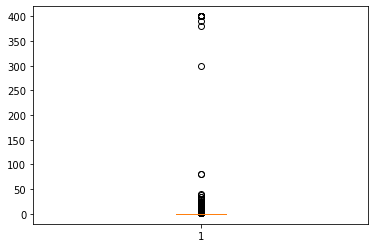

In [50]:
   
    # a. Price column
    
    #i. Make suitable plot to identify outliers in price
    
plt.boxplot(df['Price'])
plt.show()

In [51]:


# ii. Do you expect apps on the play store to cost $200? Check out these cases


print('Yes we can expect apps on the play store to cost $200')
df.loc[df['Price'] > 200]



Yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


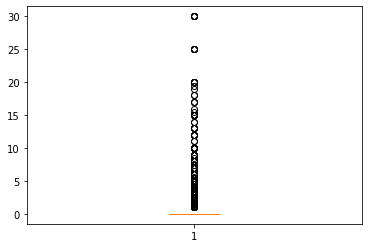

In [54]:


# iii. After dropping the useless records, make the suitable plot again to identify outliers

plt.boxplot(df['Price'])
plt.show()

In [52]:


# iv. Limit data to records with price < $30

gt_30 = df[df['Price'] > 30].index
df.drop(labels=gt_30, inplace=True)


count = df.loc[df['Price'] > 30].index
count.value_counts().sum()

0

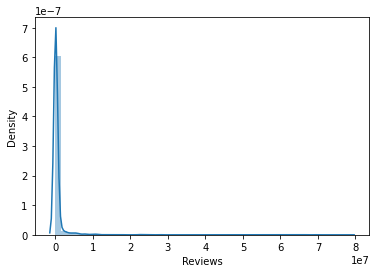

In [59]:

# b. Reviews column
#i. Make suitable plot

import sys
import warnings

if not sys.warnoptions:
       warnings.simplefilter("ignore")
    
sns.distplot(df['Reviews'])
plt.show()

In [60]:

 #ii. Limit data to apps with < 1 Million reviews
    
limit_1m = df[df['Reviews'] > 1000000 ].index
df.drop(labels = limit_1m, inplace=True)
print(limit_1m.value_counts().sum(),'cols dropped')

704 cols dropped


In [61]:


# c. Installs


# i. What is the 95th percentile of the installs?

percentile = df.Installs.quantile(0.95) 
print(percentile,"is 95th percentile of Installs")

10000000.0 is 95th percentile of Installs


In [63]:


# ii.Drop records having a value more than the 95th percentile


for i in range(0,101,1):
      print(' the {} percentile of installs is {} '.format(i,np.percentile(df['Installs'],i)))


 the 0 percentile of installs is 5.0 
 the 1 percentile of installs is 50.0 
 the 2 percentile of installs is 100.0 
 the 3 percentile of installs is 100.0 
 the 4 percentile of installs is 100.0 
 the 5 percentile of installs is 100.0 
 the 6 percentile of installs is 500.0 
 the 7 percentile of installs is 500.0 
 the 8 percentile of installs is 1000.0 
 the 9 percentile of installs is 1000.0 
 the 10 percentile of installs is 1000.0 
 the 11 percentile of installs is 1000.0 
 the 12 percentile of installs is 1000.0 
 the 13 percentile of installs is 1000.0 
 the 14 percentile of installs is 1000.0 
 the 15 percentile of installs is 1000.0 
 the 16 percentile of installs is 5000.0 
 the 17 percentile of installs is 5000.0 
 the 18 percentile of installs is 5000.0 
 the 19 percentile of installs is 5000.0 
 the 20 percentile of installs is 5000.0 
 the 21 percentile of installs is 10000.0 
 the 22 percentile of installs is 10000.0 
 the 23 percentile of installs is 10000.0 
 the 24 pe

In [64]:
temp1 = df[df["Installs"] > percentile].index
df.drop(labels = temp1, inplace = True)
print(temp1.value_counts().sum())#,'cols dropped')

199


# Task 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

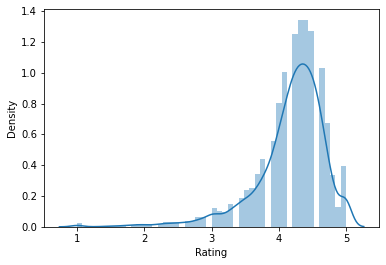

The skewness of this distribution is -1.7434270330647985
The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution


In [65]:

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
            
    #a. How do you explain this?
    
sns.distplot(df['Rating'])
plt.show()
print('The skewness of this distribution is',df['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df.Rating.median(),df.Rating.mean()))

In [66]:


# b. What is the implication of this on your analysis?

df['Rating'].mode()

0    4.3
dtype: float64

In [ ]:
 # Since mode>= median > mean, the distribution of Rating is Negatively Skewed.
    
 #   Therefore distribution of Rating is more Skewed towards lower values.

# 6. What are the top Content Rating values?

In [67]:

# a. Are there any values with very few records?

df['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [ ]:

# Adults only 18+ and Unrated are values with very few records so we drop them.

In [70]:

# b. If yes, drop those as they won’t help in the analysis

# replace the unwanted values with NaN

cr = []
for k in df['Content Rating']:
      cr.append(k.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

df['Content Rating']=cr

In [71]:
# Droping the NaN values.

temp2 = df[df["Content Rating"] == 'NaN'].index
df.drop(labels=temp2, inplace=True)
print('droped cols',temp2)

droped cols Int64Index([298, 3043, 6424, 8266], dtype='int64')


# Task 7. Effect of size on rating

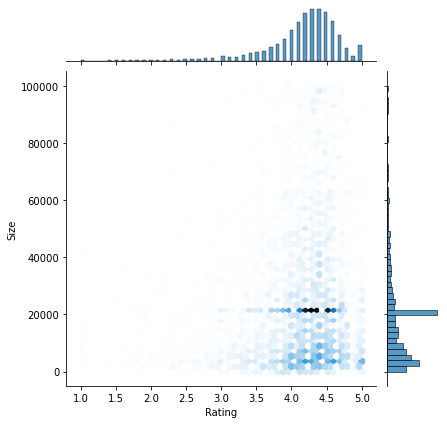

In [72]:


# a. Make a joinplot to understand the effect of size on rating

sns.jointplot(y ='Size', x ='Rating', data = df, kind ='hex')
plt.show()

In [ ]:

#  b. Do you see any patterns?

#Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

In [ ]:


#c. How do you explain the pattern?

#Generally on increasing Rating, Size of App also increases. 
# But this is not always true ie. for higher Rating, their is constant Size. 
#Thus we can conclude that their is positive correlation between Size and Rating.

# Task 8. Effect of price on rating

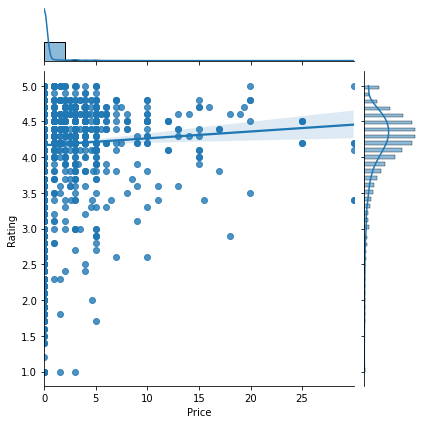

In [73]:

# a. Make a jointplot (with regression line)

sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

In [ ]:


# b. What pattern do you see?

#Generally on increasing the Price, Rating remains almost constantly greater than 4.

In [74]:

# c. How do you explain the pattern?

# Since on increasing the Price, Rating remains almost constantly greater than 4. 
# Thus it can be concluded that their is very weak Positive correlation between Rating and Price.


df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


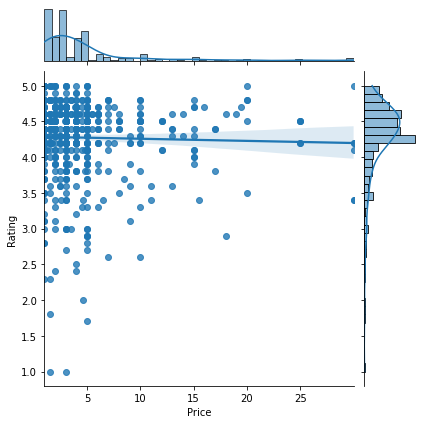

In [76]:

# d. Replot the data, this time with only records with price > 0


df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()

In [77]:


# e. Does the pattern change?

# Yes, On limiting the record with Price > 0, 
# the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117943,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117943,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


In [ ]:


# f. What is your overall inference on the effect of price on the rating

# Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. 
# For Higher Price, Rating is High and almost constant ie greater than 4

# 9. Look at all the numeric interactions together –

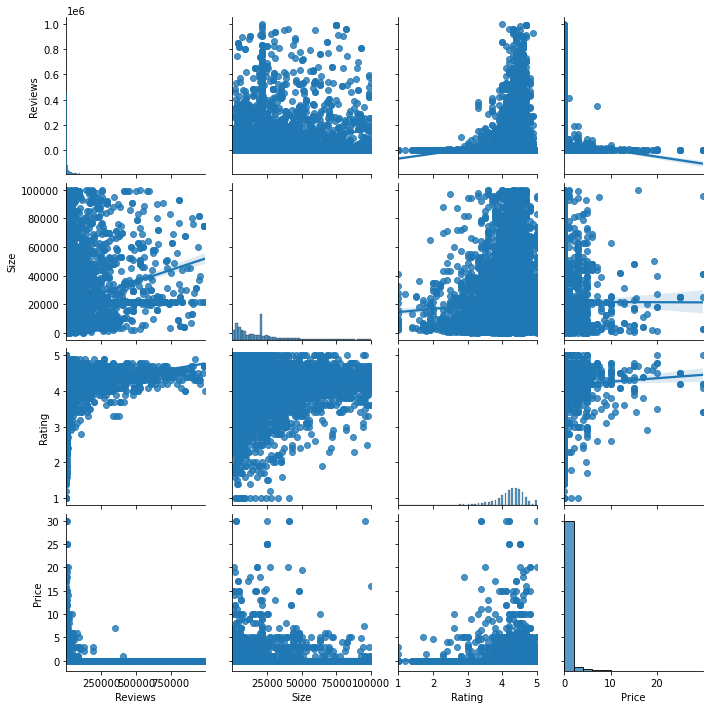

In [80]:

# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# Task 10. Rating vs. content rating

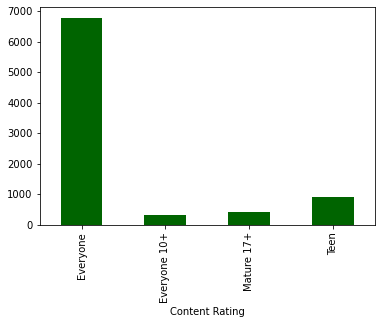

In [81]:


# a. Make a bar plot displaying the rating for each content rating

df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")
plt.show()

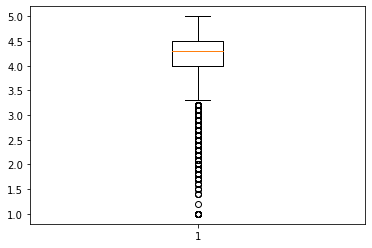

In [82]:


# b. Which metric would you use? Mean? Median? Some other quantile?

# We must use Median in this case as we are having Outliers in Rating. 
# Because in case of Outliers , median is the best measure of central tendency.

plt.boxplot(df['Rating'])
plt.show()

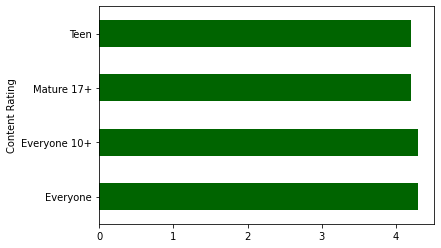

In [83]:


# c. Choose the right metric and plot

df.groupby(['Content Rating'])['Rating'].median().plot.barh(color="darkgreen")
plt.show()

# Task 11. Content rating vs. size vs. rating – 3 variables at a time

In [84]:


# a. Create 5 buckets (20% records in each) based on Size 

bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


In [85]:


# b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

temp3=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


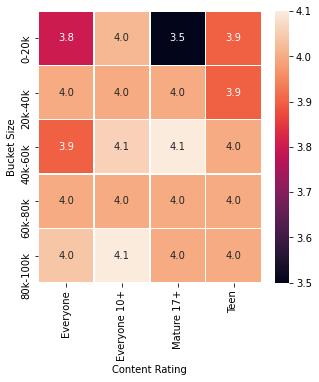

In [86]:


#c. Make a heatmap of this


   #i. Annotated
    
    
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

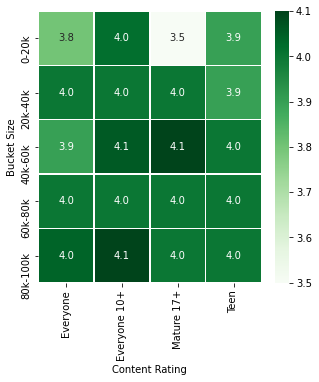

In [87]:


# ii.Greens color map

f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

In [ ]:


# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

# Based on analysis, its not true that lighter apps are preferred in all categories. 
# Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. 
# So, in general we can conclude that heavier apps are preferred in all categories.